In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install jupyter_http_over_ws

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
from IPython.display import Image
from joblib import dump, load
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV,learning_curve,cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from tensorflow.python.client import device_lib 
from tqdm.notebook import tqdm, trange
import cufflinks as cf
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import plotly
import plotly.io as pio
import pprint as pp
import requests
import seaborn as sns
import sklearn
import statsmodels.formula.api as sm
import sys 
import tensorflow as tf
import tensorflow_hub as hub  
import time
import torch
import xgboost as xgb

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.rand(10000, 256, device=device)
    y = x.to(device)
    print(x[0:5, 0:5])
    print(y.to("cpu", torch.double)[0:5, 0:5])
else:
    print('not available')

tensor([[0.4457, 0.6002, 0.5055, 0.6363, 0.6070],
        [0.7261, 0.3215, 0.8045, 0.9279, 0.8445],
        [0.8876, 0.1929, 0.8608, 0.8763, 0.8151],
        [0.1671, 0.7830, 0.6927, 0.3471, 0.6698],
        [0.1581, 0.6448, 0.4331, 0.5495, 0.9938]], device='cuda:0')
tensor([[0.4457, 0.6002, 0.5055, 0.6363, 0.6070],
        [0.7261, 0.3215, 0.8045, 0.9279, 0.8445],
        [0.8876, 0.1929, 0.8608, 0.8763, 0.8151],
        [0.1671, 0.7830, 0.6927, 0.3471, 0.6698],
        [0.1581, 0.6448, 0.4331, 0.5495, 0.9938]], dtype=torch.float64)


In [3]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18374549592403896548
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5156962304
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6946357743908346821
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:23:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [4]:
torch.cuda.is_available()

True

In [5]:
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.7.0
TF Hub version: 0.12.0
GPU available (YESSSS!!!!!)


In [6]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8196908125958726636
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5156962304
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3890146793000820234
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:23:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [8]:
def performance(fn):
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print(f'took {t2-t1} s')
        return result
    return wrapper


@performance
def this_took_forever():
    return('this took forever')
this_took_forever()

took 0.0 s


'this took forever'

In [26]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 406F-58F0

 Directory of C:\Users\Amram\Jupyter Notebook\UFC

01/15/2022  10:01 PM    <DIR>          .
01/15/2022  05:17 PM    <DIR>          ..
01/15/2022  09:50 PM    <DIR>          .ipynb_checkpoints
03/21/2021  10:26 AM         5,344,144 data.csv
08/11/2021  03:16 PM         3,302,947 pro_mma_fights.csv
01/13/2022  10:37 PM         4,570,659 ufc.csv
01/15/2022  10:01 PM         1,510,710 UFC.ipynb
01/14/2022  02:18 AM         6,887,886 ufc.pbix
01/14/2022  06:09 AM        11,733,113 ufcPreprocessed.csv
01/13/2022  11:53 PM        11,155,973 ufcPreprocessed1.csv
               7 File(s)     44,505,432 bytes
               3 Dir(s)  16,097,398,784 bytes free


In [27]:
df = pd.read_csv('ufc.csv')
d=df.copy()

In [28]:
len(df)

6012

In [29]:
pd.set_option("display.max_columns", None)
# display the dataframe head
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7.0

In [30]:
for i in range(len(df)):
    if(df.loc[i,'Winner']=='Red'):
        df.loc[i,'win'] = 1
        df.loc[i,'loss'] = 0
        df.loc[i,'draw'] = 0
    
    elif(df.loc[i,'Winner']=='Blue'):
    
        df.loc[i,'loss'] = 1
        df.loc[i,'win'] = 0
        df.loc[i,'draw'] = 0
    else:
        
        df.loc[i,'draw'] = 1
        df.loc[i,'win'] = 0
        df.loc[i,'loss'] = 0

In [31]:
df.loc[1:5,['R_fighter','B_fighter','win','loss','draw']]

,R_fighter,B_fighter,win,loss,draw
1,Trevin Giles,Roman Dolidze,1.0,0.0,0.0
2,Tai Tuivasa,Harry Hunsucker,1.0,0.0,0.0
3,Cheyanne Buys,Montserrat Conejo,0.0,1.0,0.0
4,Marion Reneau,Macy Chiasson,0.0,1.0,0.0
5,Leonardo Santos,Grant Dawson,0.0,1.0,0.0


In [32]:
bf = df.copy()
bf['fighter'] = bf['B_fighter']
rf = df.copy()
rf['fighter'] = rf['R_fighter']

In [33]:
bf.loc[0:5,['fighter','R_fighter','B_fighter','win','loss','draw']]

,fighter,R_fighter,B_fighter,win,loss,draw
0,Gustavo Lopez,Adrian Yanez,Gustavo Lopez,1.0,0.0,0.0
1,Roman Dolidze,Trevin Giles,Roman Dolidze,1.0,0.0,0.0
2,Harry Hunsucker,Tai Tuivasa,Harry Hunsucker,1.0,0.0,0.0
3,Montserrat Conejo,Cheyanne Buys,Montserrat Conejo,0.0,1.0,0.0
4,Macy Chiasson,Marion Reneau,Macy Chiasson,0.0,1.0,0.0
5,Grant Dawson,Leonardo Santos,Grant Dawson,0.0,1.0,0.0


In [34]:
rf.loc[0:5,['fighter','R_fighter','B_fighter','win','loss','draw']]

,fighter,R_fighter,B_fighter,win,loss,draw
0,Adrian Yanez,Adrian Yanez,Gustavo Lopez,1.0,0.0,0.0
1,Trevin Giles,Trevin Giles,Roman Dolidze,1.0,0.0,0.0
2,Tai Tuivasa,Tai Tuivasa,Harry Hunsucker,1.0,0.0,0.0
3,Cheyanne Buys,Cheyanne Buys,Montserrat Conejo,0.0,1.0,0.0
4,Marion Reneau,Marion Reneau,Macy Chiasson,0.0,1.0,0.0
5,Leonardo Santos,Leonardo Santos,Grant Dawson,0.0,1.0,0.0


In [35]:
df1 = pd.concat([bf,rf]).sort_values('date')

In [36]:
df1.reset_index(inplace=True)

In [37]:
df = df1.copy()

In [38]:
df.head()

,index,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,win,loss,draw,fighter
0,4506,Brandon Vera,Thiago Silva,Steve Mazzagatti,1/1/2011,"Las Vegas, Nevada, USA",Draw,False,LightHeavyweight,0.265625,0.3125,0.453281,0.257812,0.039062,0.402813,0.078125,0.015625,0.000000,0.000000,49.43750,19.640625,45.296875,10.843750,71.421875,40.500000,52.921875,16.953125,0.375000,0.046875,8.562500,4.359375,37.109375,10.484375,42.296875,8.296875,8.390625,5.812500,1.843750,1.640625,3.9375,3.34375,1.156250,0.906250,31.156250,11.125000,36.812500,5.546875,15.562500,6.359375,5.593750,3.234375,2.718750,2.156250,2.890625,2.062500,26.765625,239.046875,536.359375,10,0,4,0,4,5,2,0,0,0,0,5,0,0,Orthodox,187.96,187.96,205.0,0.407715,0.03125,0.559668,0.530625,0.292969,0.403877,0.000977,0.000000,0.000000,0.000,42.578613,21.491699,50.100098,23.121094,50.730469,28.723633,67.79248,39.012695,0.723145,0.441406,4.863281,1.470215,25.786133,7.937988,37.949707,13.113770,6.642090,5.038574,4.662109,4.048340,10.150391,8.515137,7.488281,5.958984,29.155762,12.021484,25.283203,6.027832,10.060059,6.953613,17.437500,12.19873,3.362793,2.516602,7.379395,4.894531,65.495117,249.362305,509.654785,24,0,4,0,4,7,5,0,0,0,2,4,1,0,Orthodox,190.50,198.12,230.0,28.0,33.0,0.0,0.0,1.0,Thiago Silva
1,4514,Jacob Volkmann,Antonio McKee,Steve Mazzagatti,1/1/2011,"Las Vegas, Nevada, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [39]:
df['W'] = 0
df['L'] = 0
df['wins'] = 0
df['losses'] = 0
df['Twins'] = 0
df['Tlosses'] = 0

for i in range(len(df)):
    if(df.loc[i,'fighter'] == df.loc[i,'R_fighter']):
        
        df.loc[i,'W'] = df.loc[i,'win'] 
        df.loc[i,'L'] = df.loc[i,'loss']
        df.loc[i,'wins'] = sum(df[df['fighter']==df.loc[i,'fighter']].loc[0:i,'W'])
        df.loc[i,'losses'] = sum(df[df['fighter']==df.loc[i,'fighter']].loc[0:i,'L'])
    
    if(df.loc[i,'fighter'] == df.loc[i,'B_fighter']):
        
        df.loc[i,'W'] = df.loc[i,'loss'] 
        df.loc[i,'L'] = df.loc[i,'win']
        df.loc[i,'wins'] = sum(df[df['fighter']==df.loc[i,'fighter']].loc[0:i,'W'])
        df.loc[i,'losses'] = sum(df[df['fighter']==df.loc[i,'fighter']].loc[0:i,'L'])
        
for i in range(len(df)):
    if(df.loc[i,'fighter'] == df.loc[i,'R_fighter']):
        
        df.loc[i,'W'] = df.loc[i,'win'] 
        df.loc[i,'L'] = df.loc[i,'loss']
        df.loc[i,'Twins'] = sum(df[df['fighter']==df.loc[i,'fighter']].loc[:,'W'])
        df.loc[i,'Tlosses'] = sum(df[df['fighter']==df.loc[i,'fighter']].loc[:,'L'])
    
    if(df.loc[i,'fighter'] == df.loc[i,'B_fighter']):
        
        df.loc[i,'W'] = df.loc[i,'loss'] 
        df.loc[i,'L'] = df.loc[i,'win']
        df.loc[i,'Twins'] = sum(df[df['fighter']==df.loc[i,'fighter']].loc[:,'W'])
        df.loc[i,'Tlosses'] = sum(df[df['fighter']==df.loc[i,'fighter']].loc[:,'L'])

In [40]:
def fighter_history(Name):
    return (df[df['fighter']==Name].loc[:,['win','fighter','R_fighter','B_fighter','wins','losses','Twins','date']])

In [41]:
fighter_history('TJ Dillashaw')

,win,fighter,R_fighter,B_fighter,wins,losses,Twins,date
117,1.0,TJ Dillashaw,TJ Dillashaw,Mike Easton,1,0,12,1/15/2014
225,0.0,TJ Dillashaw,TJ Dillashaw,Dominick Cruz,1,1,12,1/17/2016
335,1.0,TJ Dillashaw,Henry Cejudo,TJ Dillashaw,1,2,12,1/19/2019
1731,1.0,TJ Dillashaw,Raphael Assuncao,TJ Dillashaw,1,3,12,10/9/2013
2653,0.0,TJ Dillashaw,Cody Garbrandt,TJ Dillashaw,2,3,12,11/4/2017
3668,0.0,TJ Dillashaw,TJ Dillashaw,John Dodson,2,4,12,12/3/2011
3755,1.0,TJ Dillashaw,TJ Dillashaw,John Lineker,3,4,12,12/30/2016
4159,1.0,TJ Dillashaw,TJ Dillashaw,Walel Watson,4,4,12,2/15/2012
5322,1.0,TJ Dillashaw,TJ Dillashaw,Issei Tamura,5,4,12,3/16/2013
6463,1.0,TJ Dillashaw,TJ Dillashaw,Hugo Viana,6,4,12,4/20/2013


In [42]:
df.loc[0:5,['fighter','R_fighter','B_fighter','win','loss','draw','Twins','Tlosses','wins','losses','W','L']]

,fighter,R_fighter,B_fighter,win,loss,draw,Twins,Tlosses,wins,losses,W,L
0,Thiago Silva,Brandon Vera,Thiago Silva,0.0,0.0,1.0,7,3,0,0,0,0
1,Antonio McKee,Jacob Volkmann,Antonio McKee,1.0,0.0,0.0,0,1,0,1,0,1
2,Greg Soto,Daniel Roberts,Greg Soto,1.0,0.0,0.0,1,2,0,1,0,1
3,Diego Nunes,Mike Brown,Diego Nunes,0.0,1.0,0.0,3,3,1,0,1,0
4,Gray Maynard,Frankie Edgar,Gray Maynard,0.0,0.0,1.0,11,7,0,0,0,0
5,Takanori Gomi,Clay Guida,Takanori Gomi,1.0,0.0,0.0,4,9,0,1,0,1


In [43]:
def left(s, amount):
    return s[:amount]

def right(s, amount):
    return s[-amount:]

def mid(s, offset, amount):
    return s[offset:offset+amount]

In [44]:
pd.set_option("display.max_columns", None)
df

,index,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,win,loss,draw,fighter,W,L,wins,losses,Twins,Tlosses
0,4506,Brandon Vera,Thiago Silva,Steve Mazzagatti,1/1/2011,"Las Vegas, Nevada, USA",Draw,False,LightHeavyweight,0.265625,0.31250,0.453281,0.257812,0.039062,0.402813,0.078125,0.015625,0.000000,0.000000,49.43750,19.640625,45.296875,10.843750,71.421875,40.500000,52.921875,16.953125,0.375000,0.046875,8.562500,4.359375,37.109375,10.484375,42.296875,8.296875,8.390625,5.812500,1.843750,1.640625,3.9375,3.34375,1.156250,0.906250,31.156250,11.125000,36.812500,5.546875,15.562500,6.359375,5.593750,3.234375,2.718750,2.156250,2.890625,2.062500,26.765625,239.046875,536.359375,10,0,4,0,4,5,2,0,0,0,0,5,0,0,Orthodox,187.96,187.96,205.0,0.407715,0.031250,0.559668,0.530625,0.292969,0.403877,0.000977,0.000000,0.000000,0.000000,42.578613,21.491699,50.100098,23.121094,50.730469,28.723633,67.792480,39.012695,0.723145,0.441406,4.863281,1.470215,25.786133,7.937988,37.949707,13.113770,6.642090,5.038574,4.662109,4.048340,10.150391,8.515137,7.488281,5.958984,29.155762,12.021484,25.283203,6.027832,10.060059,6.953613,17.437500,12.198730,3.362793,2.516602,7.379395,4.894531,65.495117,249.362305,509.654785,24,0,4,0,4,7,5,0,0,0,2,4,1,0,Orthodox,190.50,198.12,230.0,28.0,33.0,0.0,0.0,1.0,Thiago Silva,0,0,0,0,7,3
1,4514,Jacob Volkmann,Antonio McKee,Steve Mazzagatti,1/1/2011,"Las Vegas, Nevada, USA",Red,False,Lightweight,NaN,NaN,NaN,Na

In [45]:
l = df.columns.values


for i in range(len(df)):
    if(df.loc[i,'fighter']==df.loc[i,'B_fighter']):
        for j in range(len(l)):
            if(left(l[j],2)=='B_'):
                df.loc[i,'f_'+right(l[j],len(l[j])-2)] = df.loc[i,l[j]]
                df.loc[i,'o_'+right(l[j],len(l[j])-2)] = df.loc[i,'R_'+right(l[j],len(l[j])-2)]
    else:
        for j in range(len(l)):
            if(left(l[j],2)=='R_'):
                df.loc[i,'f_'+right(l[j],len(l[j])-2)] = df.loc[i,l[j]]
                df.loc[i,'o_'+right(l[j],len(l[j])-2)] = df.loc[i,'B_'+right(l[j],len(l[j])-2)]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [46]:
l = df.columns.values

for i in range(len(l)):
    if(left(l[i],2)=='B_'):
        df = df.drop(l[i],axis=1)
    elif(left(l[i],2)=='R_'):
        df = df.drop(l[i],axis=1)

In [47]:
df.reset_index(inplace=True, drop=True)

In [48]:
for i in range(len(df)):
    if df.loc[i, 'win'] == 1:
        df.loc[i, 'y'] = 1
    elif df.loc[i, 'win'] == 0:
        df.loc[i, 'y'] = 0
    else:
        df.loc[i, 'y'] == 2

In [49]:
df = df.drop('win', axis=1)
df = df.drop('loss', axis=1)
df = df.drop('draw', axis=1)

In [50]:
df

,index,Referee,date,location,Winner,title_bout,weight_class,fighter,W,L,wins,losses,Twins,Tlosses,f_fighter,o_fighter,f_avg_KD,o_avg_KD,f_avg_opp_KD,o_avg_opp_KD,f_avg_SIG_STR_pct,o_avg_SIG_STR_pct,f_avg_opp_SIG_STR_pct,o_avg_opp_SIG_STR_pct,f_avg_TD_pct,o_avg_TD_pct,f_avg_opp_TD_pct,o_avg_opp_TD_pct,f_avg_SUB_ATT,o_avg_SUB_ATT,f_avg_opp_SUB_ATT,o_avg_opp_SUB_ATT,f_avg_REV,o_avg_REV,f_avg_opp_REV,o_avg_opp_REV,f_avg_SIG_STR_att,o_avg_SIG_STR_att,f_avg_SIG_STR_landed,o_avg_SIG_STR_landed,f_avg_opp_SIG_STR_att,o_avg_opp_SIG_STR_att,f_avg_opp_SIG_STR_landed,o_avg_opp_SIG_STR_landed,f_avg_TOTAL_STR_att,o_avg_TOTAL_STR_att,f_avg_TOTAL_STR_landed,o_avg_TOTAL_STR_landed,f_avg_opp_TOTAL_STR_att,o_avg_opp_TOTAL_STR_att,f_avg_opp_TOTAL_STR_landed,o_avg_opp_TOTAL_STR_landed,f_avg_TD_att,o_avg_TD_att,f_avg_TD_landed,o_avg_TD_landed,f_avg_opp_TD_att,o_avg_opp_TD_att,f_avg_opp_TD_landed,o_avg_opp_TD_landed,f_avg_HEAD_att,o_avg_HEAD_att,f_avg_HEAD_landed,o_avg_HEAD_landed,f_avg_opp_HEAD_att,o_avg_opp_HEAD_att,f_avg_opp_HEAD_landed,o_avg_opp_HEAD_landed,f_avg_BODY_att,o_avg_BODY_att,f_avg_BODY_landed,o_avg_BODY_landed,f_avg_opp_BODY_att,o_avg_opp_BODY_att,f_avg_opp_BODY_landed,o_avg_opp_BODY_landed,f_avg_LEG_att,o_avg_LEG_att,f_avg_LEG_landed,o_avg_LEG_landed,f_avg_opp_LEG_att,o_avg_opp_LEG_att,f_avg_opp_LEG_landed,o_avg_opp_LEG_landed,f_avg_DISTANCE_att,o_avg_DISTANCE_att,f_avg_DISTANCE_landed,o_avg_DISTANCE_landed,f_avg_opp_DISTANCE_att,o_avg_opp_DISTANCE_att,f_avg_opp_DISTANCE_landed,o_avg_opp_DISTANCE_landed,f_avg_CLINCH_att,o_avg_CLINCH_att,f_avg_CLINCH_landed,o_avg_CLINCH_landed,f_avg_opp_CLINCH_att,o_avg_opp_CLINCH_att,f_avg_opp_CLINCH_landed,o_avg_opp_CLINCH_landed,f_avg_GROUND_att,o_avg_GROUND_att,f_avg_GROUND_landed,o_avg_GROUND_landed,f_avg_opp_GROUND_att,o_avg_opp_GROUND_att,f_avg_opp_GROUND_landed,o_avg_opp_GROUND_landed,f_avg_CTRL_time(seconds),o_avg_CTRL_time(seconds),f_avg_opp_CTRL_time(seconds),o_avg_opp_CTRL_time(seconds),f_total_time_fought(seconds),o_total_time_fought(seconds),f_total_rounds_fought,o_total_rounds_fought,f_total_title_bouts,o_total_title_bouts,f_current_win_streak,o_current_win_streak,f_current_lose_streak,o_current_lose_streak,f_longest_win_streak,o_longest_win_streak,f_wins,o_wins,f_losses,o_losses,f_draw,o_draw,f_win_by_Decision_Majority,o_win_by_Decision_Majority,f_win_by_Decision_Split,o_win_by_Decision_Split,f_win_by_Decision_Unanimous,o_win_by_Decision_Unanimous,f_win_by_KO/TKO,o_win_by_KO/TKO,f_win_by_Submission,o_win_by_Submission,f_win_by_TKO_Doctor_Stoppage,o_win_by_TKO_Doctor_Stoppage,f_Stance,o_Stance,f_Height_cms,o_Height_cms,f_Reach_cms,o_Reach_cms,f_Weight_lbs,o_Weight_lbs,f_age,o_age,y
0,4506,Steve Mazzagatti,1/1/2011,"Las Vegas, Nevada, USA",Draw,False,LightHeavyweight,Thiago Silva,0,0,0,0,7,3,Thiago Silva,Brandon Vera,0.265625,0.407715,0.312500,0.031250,0.453281,0.559668,0.257812,0.530625,0.039062,0.292969,0.402813,0.403877,0.078125,0.000977,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,49.437500,42.578613,19.640625,21.491699,45.296875,50.100098,10.843750,23.121094,71.421875,50.730469,40.500000,28.723633,52.921875,67.792480,16.953125,39.012695,0.375000,0.723145,0.046875,0.441406,8.562500,4.863281,4.359375,1.470215,37.109375,25.786133,10.484375,7.937988,42.296875,37.949707,8.296875,13.113770,8.390625,6.642090,5.812500,5.038574,1.843750,4.662109,1.640625,4.048340,3.937500,10.150391,3.343750,8.515137,1.156250,7.488281,0.906250,5.958984,31.156250,29.155762,11.125000,12.021484,36.812500,25.283203,5.546875,6.027832,15.562500,10.060059,6.359375,6.953613,5.593750,17.437500,3.234375,12.198730,2.718750,3.362793,2.156250,2.516602,2.890625,7.379395,2.062500,4.894531,26.765625,65.495117,239.046875,249.362305,536.359375,509.654785,10.0,24.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0,5.0,7.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0,0.0,1.0,0.0,0.0,Orthodox,Orthodox,187.96,190.50,187.96,198.12,205.0,230.0,28.0,33.0,0.0
1,4514,Steve Mazzagatti,1/1/2011,"Las Vegas, Nevada, USA",Red,False,Lightweight,An

In [51]:
df.shape

(12024, 153)

In [52]:
X = df.drop('y', axis=1)
X = pd.get_dummies(X)
y = df['y']

In [53]:
dfNoNa = df.copy()
dfNoNa = dfNoNa.dropna()

In [54]:
X = dfNoNa.drop('y', axis=1)
X = pd.get_dummies(X)
y = dfNoNa['y']

In [55]:
param_grid_Ridge = [{
    'solver':['svd', 'cholesky', 'lsqr'],
    'alpha': [.000001, .00001, .001, .01, .1],
    'normalize':[True, False]}]
param_grid_Lasso = [{
    'alpha': [ .000001, .00001, .001, .01, .1,1,10,100],
    'fit_intercept':[True, False],
    'normalize':[True, False]}]
param_grid_knn = [{},{'n_neighbors':[1,2,3,4]}]
param_grid_LR = [{'fit_intercept':[True, False],
    'normalize':[True, False]}]
param_grid_tree = [{'random_state':[1]},{'criterion':['gini'], 'max_depth':[2,3], 'min_samples_split':[3,5],'random_state':[1]}]
param_grid_rf = [{'random_state':[1]},{'n_estimators':[10,30],'max_features':[0.2, 0.3], 'bootstrap':[True],'random_state':[1]}]
param_grid_boost = [{'random_state':[1]},{'n_estimators':[5,10,20],'learning_rate':[0.1,.5,1],'random_state':[1]}]

In [56]:
model_names = ['Ridge','Lasso','KNN','LR','Tree','RF','Boosting']

def init_regressors():
    return([(Ridge(), model_names[0], param_grid_Ridge), 
            (Lasso(), model_names[1], param_grid_Lasso),
            (KNeighborsRegressor(), model_names[2], param_grid_knn),
            (LinearRegression(), model_names[3], param_grid_LR),
            (DecisionTreeRegressor(), model_names[4], param_grid_tree),
            (RandomForestRegressor(), model_names[5], param_grid_rf),
            (GradientBoostingRegressor(), model_names[6], param_grid_boost)
           ])

In [57]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=6, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

  0%|          | 0/7 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

0.9999999999999989
Ridge(alpha=1e-06, normalize=False, solver='svd')


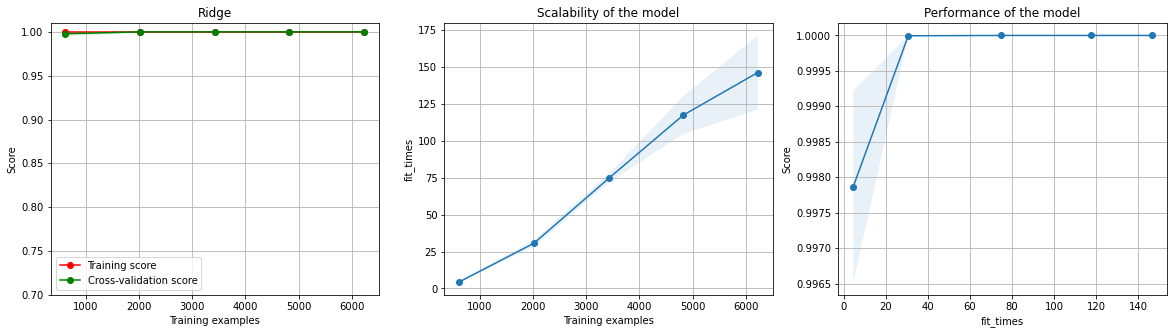

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.899e-01, tolerance: 3.811e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.487e-01, toler

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.151e+00, tolerance: 3.774e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+00, tolerance: 3.811e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.469e-01, tolerance: 3.770e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

0.9999999554774103
Lasso(alpha=1e-06, normalize=True)


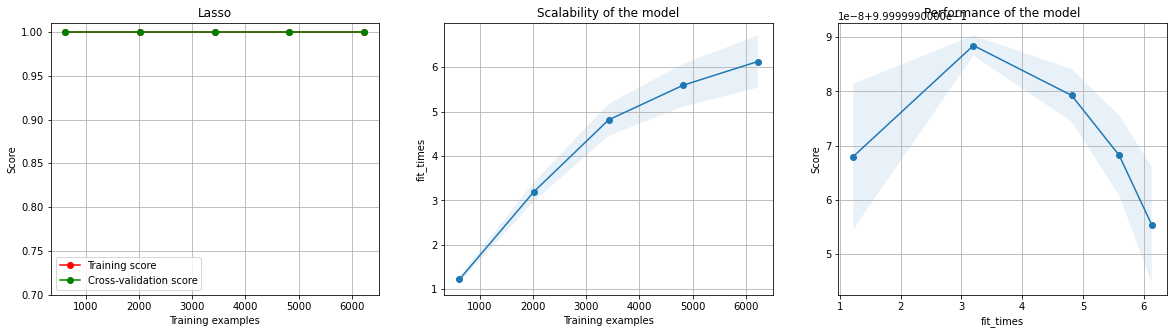

-0.11470793120464658
KNeighborsRegressor()


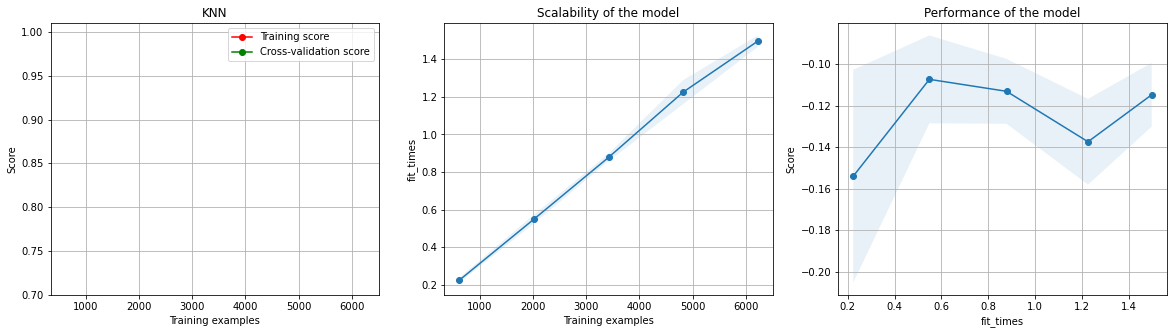

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

0.9999999948250442
LinearRegression(normalize=False)


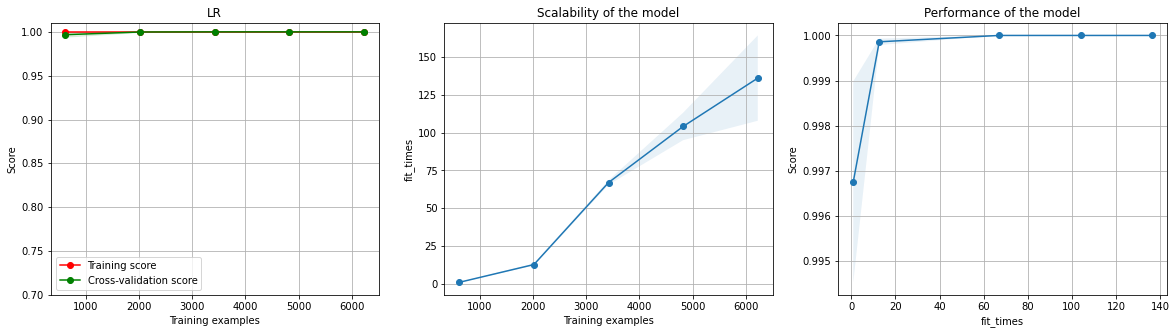

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 356, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'gini'

  warnings.

1.0
DecisionTreeRegressor(random_state=1)


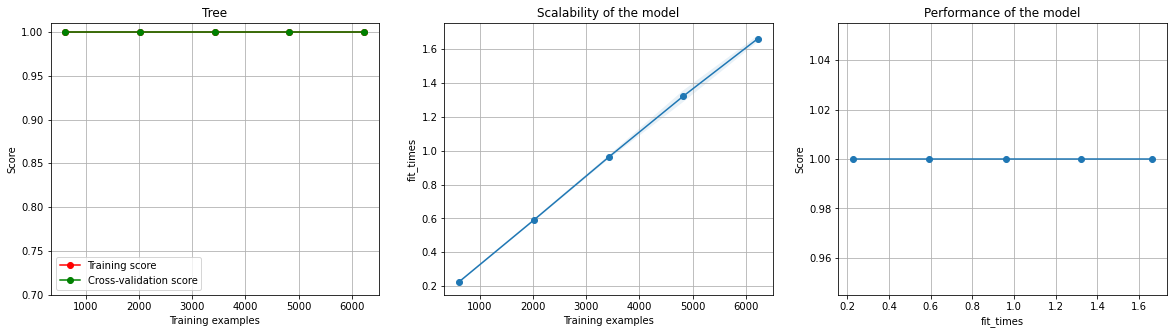

1.0
RandomForestRegressor(random_state=1)


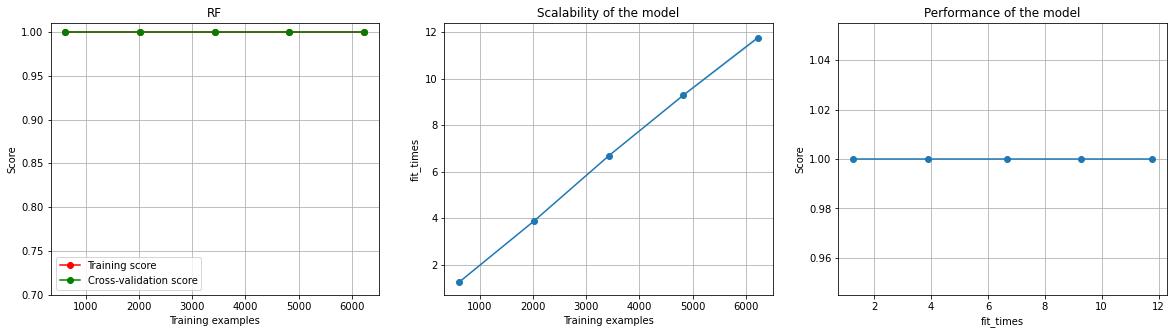

1.0
GradientBoostingRegressor(learning_rate=1, n_estimators=5, random_state=1)


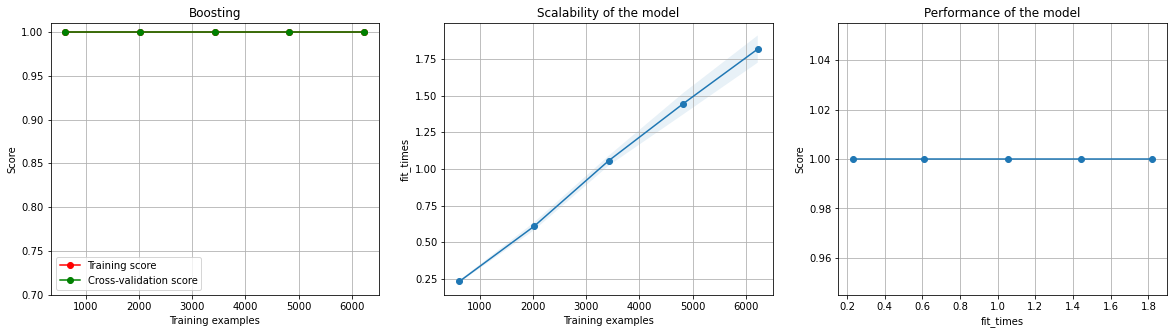

In [58]:
for i in trange(7):
    model = init_regressors()[i][0]
    params = init_regressors()[i][2]
    name = model_names[i]
    #will grid search through multiple params to fine tune our models to find a string version for each model to compare
    #setting the cross validation count to 10
    clf = sklearn.model_selection.GridSearchCV(model,params,cv=5,scoring='r2')
    results= clf.fit(X, y)
    print(results.best_score_)
    estimator = results.best_estimator_
    print(estimator)
    plot_learning_curve(estimator, name, X, y, (0.7, 1.01), cv=None, n_jobs=6)
    plt.show()

In [59]:
param_grid_svc = [{'C':[0.1,1],'kernel':['rbf','linear'], 'gamma':['auto'],'max_iter':[-1],'random_state':[1]}]
param_grid_knn = [{},{'n_neighbors':[1,2,3,4]}]
param_grid_nb = [{}]
param_grid_tree = [{'random_state':[1]},{'criterion':['gini'], 'max_depth':[2,3], 'min_samples_split':[3,5],'random_state':[1]}]
param_grid_rf = [{'random_state':[1]},{'n_estimators':[10,30],'max_features':[0.2, 0.3], 'bootstrap':[True],'random_state':[1]}]
param_grid_boost = [{'random_state':[1]},{'n_estimators':[10,20],'learning_rate':[0.1,1],'random_state':[1]}]

model_names = ['SVM','KNN','NB','Tree','RF','Boosting']

def init_classifiers():
    return([(SVC(), model_names[0], param_grid_svc), 
            (KNeighborsClassifier(), model_names[1], param_grid_knn),
            (GaussianNB(), model_names[2], param_grid_nb),
            (DecisionTreeClassifier(), model_names[3], param_grid_tree),
            (RandomForestClassifier(), model_names[4], param_grid_rf),
            (AdaBoostClassifier(), model_names[5], param_grid_boost)
           ])

In [60]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=6, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

  0%|          | 0/6 [00:00<?, ?it/s]

1.0
SVC(C=0.1, gamma='auto', kernel='linear', random_state=1)


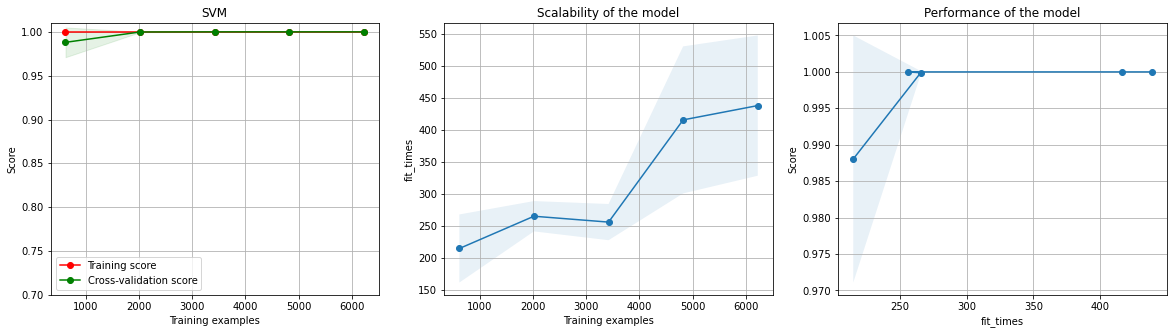

-0.769066877282105
KNeighborsClassifier(n_neighbors=3)


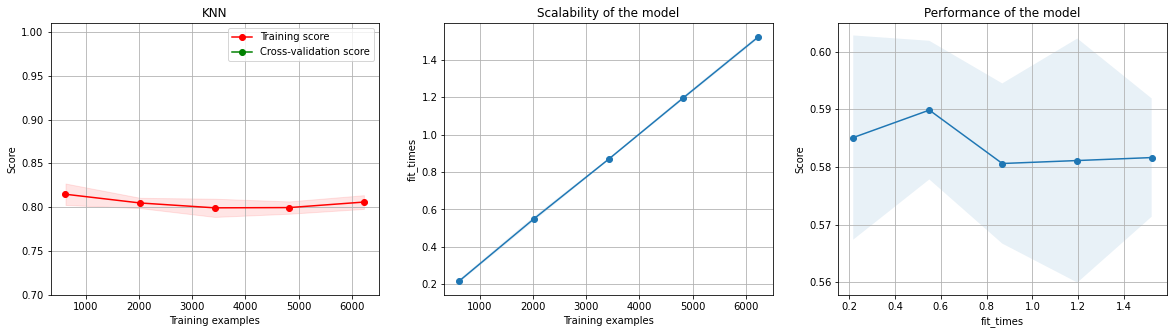

0.938580578961969
GaussianNB()


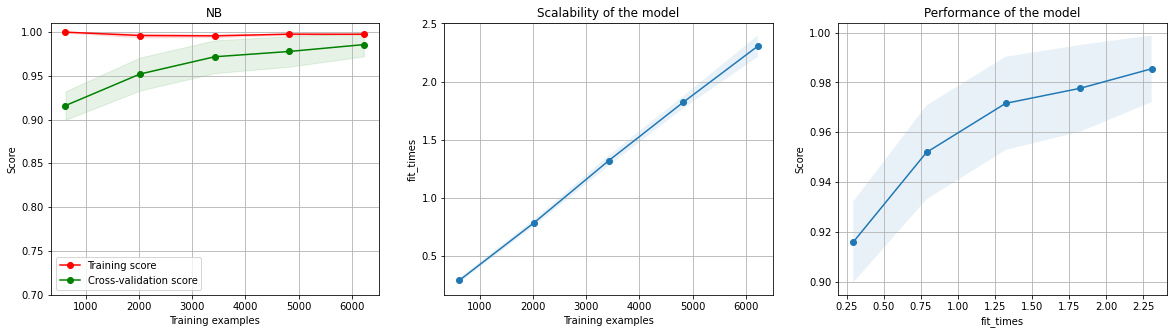

1.0
DecisionTreeClassifier(random_state=1)


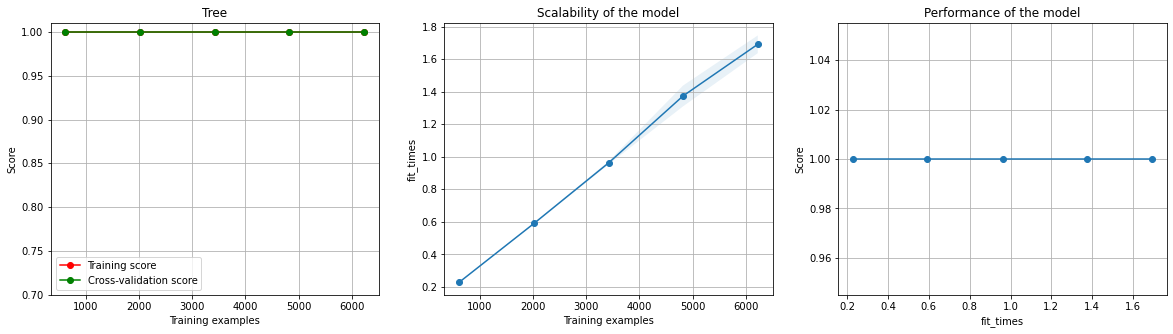

1.0
RandomForestClassifier(max_features=0.2, n_estimators=10, random_state=1)


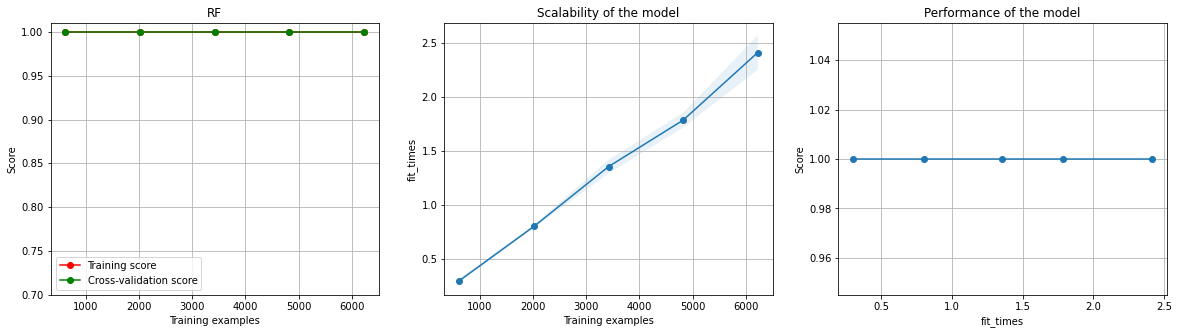

1.0
AdaBoostClassifier(random_state=1)


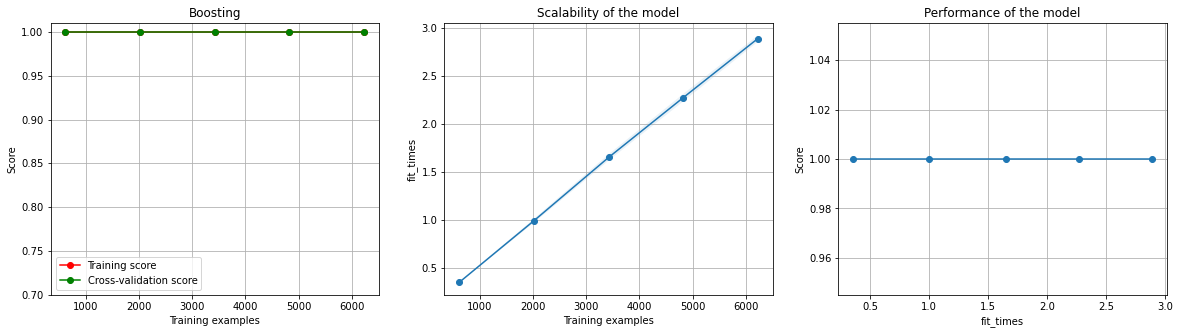

In [61]:
for i in trange(6):
    model = init_classifiers()[i][0]
    params = init_classifiers()[i][2]
    name = model_names[i]
    #will grid search through multiple params to fine tune our models to find a string version for each model to compare
    #setting the cross validation count to 10
    clf = sklearn.model_selection.GridSearchCV(model,params,cv =5,scoring='r2')
    results= clf.fit(X, y)
    print(results.best_score_)
    estimator = results.best_estimator_
    print(estimator)
    plot_learning_curve(estimator, name, X, y, (0.7, 1.01), cv=None, n_jobs=6)
    plt.show()

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [62]:
df.to_csv('ufcPreprocessed.csv')

In [63]:
df.isna().sum()

index             0
Referee          64
date              0
location          0
Winner            0
               ... 
f_Weight_lbs     10
o_Weight_lbs     10
f_age           235
o_age           235
y                 0
Length: 153, dtype: int64

In [10]:
df2 = pd.read_csv('pro_mma_fights.csv')

In [11]:
df2

,url,event_title,organisation,date,location,match_nr,fighter1_url,fighter2_url,fighter1_name,fighter2_name,fighter1_result,fighter2_result,win_method,win_details,referee,round,time
0,/events/UFC-265-Lewis-vs-Gane-89140,UFC 265 - Lewis vs. Gane,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",13,/fighter/Ciryl-Gane-293973,/fighter/Derrick-Lewis-59284,Ciryl Gane,Derrick Lewis,win,loss,TKO,Punches,Dan Miragliotta,3,4:11
1,/events/UFC-265-Lewis-vs-Gane-89140,UFC 265 - Lewis vs. Gane,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",12,/fighter/Jose-Aldo-11506,/fighter/Pedro-Munhoz-52407,Jose Aldo,Pedro Munhoz,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
2,/events/UFC-265-Lewis-vs-Gane-89140,UFC 265 - Lewis vs. Gane,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",11,/fighter/Vicente-Luque-66474,/fighter/Michael-Chiesa-46224,Vicente Luque,Michael Chiesa,win,loss,Submission,Brabo Choke,Kerry Hatley,1,03:25
3,/events/UFC-265-Lewis-vs-Gane-89140,UFC 265 - Lewis vs. Gane,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",10,/fighter/Tecia-Torres-85096,/fighter/Angela-Hill-148517,Tecia Torres,Angela Hill,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
4,/events/UFC-265-Lewis-vs-Gane-89140,UFC 265 - Lewis vs. Gane,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",9,/fighter/Yadong-Song-103807,/fighter/Casey-Kenney-211031,Yadong Song,Casey Kenney,win,loss,Decision,Split,Dan Miragliotta,3,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,/events/One-FC-Champion-vs-Champion-17781,One FC - Champion vs. Champion,One Championship,"Sep 3, 2011","Singapore Indoor Stadium, Kallang, Singapore, ...",5,/fighter/Eddie-Ng-22810,/fighter/Chunbo-Yuan-69455,Eddie Ng,Chunbo Yuan,win,loss,KO,Punches,Matt Hume,1,00:45
10444,/events/One-FC-Champion-vs-Champion-17781,One FC - Champion vs. Champion,One Championship,"Sep 3, 2011","Singapore Indoor Stadium, Kallang, Singapore, ...",4,/fighter/Radeem-Rahman-82583,/fighter/Susovan-Ghosh-83117,Radeem Rahman,Susovan Ghosh,win,loss,TKO,Punches,Matt Hume,1,03:18
10445,/events/One-FC-Champion-vs-Champion-17781,One FC - Champion vs. Champion,One Championship,"Sep 3, 2011","Singapore Indoor Stadium, Kallang, Singapore, ...",3,/fighter/Vuyisile-Colossa-65229,/fighter/Xing-Yu-Ma-84170,Vuyisile Colossa,Xing Yu Ma,win,loss,TKO,Punches,Matt Hume,1,00:49
10446,/events/One-FC-Champion-vs-Champion-17781,One FC - Champion vs. Champion,One Championship,"Sep 3, 2011","Singapore Indoor Stadium, Kallang, Singapore, ...",2,/fighter/Yodsanan-Sityodtong-82604,/fighter/Daniel-Mashamaite-78614,Yodsanan Sityodtong,Daniel Mashamaite,win,loss,TKO,Knee,Yuji Shimada,2,00:14


In [12]:
df3 = df2.drop(['url', 'event_title', 'fighter1_url', 'fighter2_url'],axis=1)
df3

,organisation,date,location,match_nr,fighter1_name,fighter2_name,fighter1_result,fighter2_result,win_method,win_details,referee,round,time
0,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",13,Ciryl Gane,Derrick Lewis,win,loss,TKO,Punches,Dan Miragliotta,3,4:11
1,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",12,Jose Aldo,Pedro Munhoz,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
2,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",11,Vicente Luque,Michael Chiesa,win,loss,Submission,Brabo Choke,Kerry Hatley,1,03:25
3,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",10,Tecia Torres,Angela Hill,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
4,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",9,Yadong Song,Casey Kenney,win,loss,Decision,Split,Dan Miragliotta,3,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,One Championship,"Sep 3, 2011","Singapore Indoor Stadium, Kallang, Singapore, ...",5,Eddie Ng,Chunbo Yuan,win,loss,KO,Punches,Matt Hume,1,00:45
10444,One Championship,"Sep 3, 2011","Singapore Indoor Stadium, Kallang, Singapore, ...",4,Radeem Rahman,Susovan Ghosh,win,loss,TKO,Punches,Matt Hume,1,03:18
10445,One Championship,"Sep 3, 2011","Singapore Indoor Stadium, Kallang, Singapore, ...",3,Vuyisile Colossa,Xing Yu Ma,win,loss,TKO,Punches,Matt Hume,1,00:49
10446,One Championship,"Sep 3, 2011","Singapore Indoor Stadium, Kallang, Singapore, ...",2,Yodsanan Sityodtong,Daniel Mashamaite,win,loss,TKO,Knee,Yuji Shimada,2,00:14


In [13]:
df3[df3['organisation']=='Ultimate Fighting Championship (UFC)']

,organisation,date,location,match_nr,fighter1_name,fighter2_name,fighter1_result,fighter2_result,win_method,win_details,referee,round,time
0,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",13,Ciryl Gane,Derrick Lewis,win,loss,TKO,Punches,Dan Miragliotta,3,4:11
1,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",12,Jose Aldo,Pedro Munhoz,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
2,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",11,Vicente Luque,Michael Chiesa,win,loss,Submission,Brabo Choke,Kerry Hatley,1,03:25
3,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",10,Tecia Torres,Angela Hill,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
4,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",9,Yadong Song,Casey Kenney,win,loss,Decision,Split,Dan Miragliotta,3,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,Ultimate Fighting Championship (UFC),"Nov 12, 1993","McNichols Arena, Denver, Colorado, United States",5,Gerard Gordeau,Kevin Rosier,win,loss,TKO,Corner Stoppage,Joao Alberto Barreto,1,00:59
6208,Ultimate Fighting Championship (UFC),"Nov 12, 1993","McNichols Arena, Denver, Colorado, United States",4,Ken Shamrock,Patrick Smith,win,loss,Submission,Heel Hook,Helio Vigio,1,01:49
6209,Ultimate Fighting Championship (UFC),"Nov 12, 1993","McNichols Arena, Denver, Colorado, United States",3,Royce Gracie,Art Jimmerson,win,loss,Submission,Smother Choke,Joao Alberto Barreto,1,02:18
6210,Ultimate Fighting Championship (UFC),"Nov 12, 1993","McNichols Arena, Denver, Colorado, United States",2,Kevin Rosier,Zane Frazier,win,loss,TKO,Punches,Helio Vigio,1,04:20


In [14]:
df3['date'] = pd.to_datetime(df3['date'])

In [15]:
pd.set_option("display.max_columns", None)
df3

,organisation,date,location,match_nr,fighter1_name,fighter2_name,fighter1_result,fighter2_result,win_method,win_details,referee,round,time
0,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",13,Ciryl Gane,Derrick Lewis,win,loss,TKO,Punches,Dan Miragliotta,3,4:11
1,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",12,Jose Aldo,Pedro Munhoz,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
2,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",11,Vicente Luque,Michael Chiesa,win,loss,Submission,Brabo Choke,Kerry Hatley,1,03:25
3,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",10,Tecia Torres,Angela Hill,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
4,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",9,Yadong Song,Casey Kenney,win,loss,Decision,Split,Dan Miragliotta,3,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",5,Eddie Ng,Chunbo Yuan,win,loss,KO,Punches,Matt Hume,1,00:45
10444,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",4,Radeem Rahman,Susovan Ghosh,win,loss,TKO,Punches,Matt Hume,1,03:18
10445,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",3,Vuyisile Colossa,Xing Yu Ma,win,loss,TKO,Punches,Matt Hume,1,00:49
10446,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",2,Yodsanan Sityodtong,Daniel Mashamaite,win,loss,TKO,Knee,Yuji Shimada,2,00:14


In [16]:
df3.groupby('organisation').count()

,date,location,match_nr,fighter1_name,fighter2_name,fighter1_result,fighter2_result,win_method,win_details,referee,round,time
organisation,,,,,,,,,,,,
Bellator MMA,2898,2898,2898,2898,2898,2898,2898,2898,2898,2666,2898,2895
One Championship,1338,1338,1338,1338,1338,1338,1338,1338,1338,1295,1338,1335
Ultimate Fighting Championship (UFC),6212,6212,6212,6212,6212,6212,6212,6212,6212,6201,6212,6212


In [17]:
df3.dtypes

organisation               object
date               datetime64[ns]
location                   object
match_nr                    int64
fighter1_name              object
fighter2_name              object
fighter1_result            object
fighter2_result            object
win_method                 object
win_details                object
referee                    object
round                       int64
time                       object
dtype: object

In [18]:
df3

,organisation,date,location,match_nr,fighter1_name,fighter2_name,fighter1_result,fighter2_result,win_method,win_details,referee,round,time
0,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",13,Ciryl Gane,Derrick Lewis,win,loss,TKO,Punches,Dan Miragliotta,3,4:11
1,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",12,Jose Aldo,Pedro Munhoz,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
2,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",11,Vicente Luque,Michael Chiesa,win,loss,Submission,Brabo Choke,Kerry Hatley,1,03:25
3,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",10,Tecia Torres,Angela Hill,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
4,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",9,Yadong Song,Casey Kenney,win,loss,Decision,Split,Dan Miragliotta,3,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",5,Eddie Ng,Chunbo Yuan,win,loss,KO,Punches,Matt Hume,1,00:45
10444,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",4,Radeem Rahman,Susovan Ghosh,win,loss,TKO,Punches,Matt Hume,1,03:18
10445,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",3,Vuyisile Colossa,Xing Yu Ma,win,loss,TKO,Punches,Matt Hume,1,00:49
10446,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",2,Yodsanan Sityodtong,Daniel Mashamaite,win,loss,TKO,Knee,Yuji Shimada,2,00:14


In [19]:
df3['referee'] = df3['referee'].astype(str)

In [20]:
for i in trange(len(df3)):
    if df3.loc[i, 'referee'] == 'nan':
        df3.loc[i, 'referee'] = 'Unknown Referee'

  0%|          | 0/10448 [00:00<?, ?it/s]

In [21]:
df3.isna().sum()

organisation       0
date               0
location           0
match_nr           0
fighter1_name      0
fighter2_name      0
fighter1_result    0
fighter2_result    0
win_method         0
win_details        0
referee            0
round              0
time               6
dtype: int64

In [22]:
df3.loc[df3['win_method'] == 'TKO', 'time']

11       05:00
14       01:00
22       04:21
25       03:48
27       02:11
         ...  
10437    00:47
10442    01:59
10444    03:18
10445    00:49
10446    00:14
Name: time, Length: 2049, dtype: object

In [23]:
df3.loc[i, :]

organisation                                        One Championship
date                                             2011-09-03 00:00:00
location           Singapore Indoor Stadium, Kallang, Singapore, ...
match_nr                                                           1
fighter1_name                                           Leandro Issa
fighter2_name                                           Soo Chul Kim
fighter1_result                                                  win
fighter2_result                                                 loss
win_method                                                  Decision
win_details                                                Unanimous
referee                                                 Yuji Shimada
round                                                              3
time                                                           05:00
Name: 10447, dtype: object

In [24]:
df3['time'] = df3['time'].astype(str)
for i in trange(len(df3[df3['time'].isna()])):
    df3[i,'time'] = '02:30'

0it [00:00, ?it/s]

In [25]:
df3.drop('match_nr', axis=1, inplace=True)
df3

,organisation,date,location,fighter1_name,fighter2_name,fighter1_result,fighter2_result,win_method,win_details,referee,round,time
0,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",Ciryl Gane,Derrick Lewis,win,loss,TKO,Punches,Dan Miragliotta,3,4:11
1,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",Jose Aldo,Pedro Munhoz,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
2,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",Vicente Luque,Michael Chiesa,win,loss,Submission,Brabo Choke,Kerry Hatley,1,03:25
3,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",Tecia Torres,Angela Hill,win,loss,Decision,Unanimous,Mike Beltran,3,05:00
4,Ultimate Fighting Championship (UFC),2021-08-07,"Toyota Center, Houston, Texas, United States",Yadong Song,Casey Kenney,win,loss,Decision,Split,Dan Miragliotta,3,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
10443,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",Eddie Ng,Chunbo Yuan,win,loss,KO,Punches,Matt Hume,1,00:45
10444,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",Radeem Rahman,Susovan Ghosh,win,loss,TKO,Punches,Matt Hume,1,03:18
10445,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",Vuyisile Colossa,Xing Yu Ma,win,loss,TKO,Punches,Matt Hume,1,00:49
10446,One Championship,2011-09-03,"Singapore Indoor Stadium, Kallang, Singapore, ...",Yodsanan Sityodtong,Daniel Mashamaite,win,loss,TKO,Knee,Yuji Shimada,2,00:14


In [57]:
df3['win_method'].unique()

array([' TKO', 'Decision', 'Submission', 'KO', 'TKO', ' Decision', 'Draw',
       ' Submission', 'No Contest', 'Technical Submission', ' KO',
       'Disqualification', 'Technical Decision', ' No Contest', ' Draw',
       ' Technical Submission', 'NC', 'DQ', 'Verbal Submission', ' NC',
       'Submision', ' Technical Decision', 'Submisson'], dtype=object)

In [58]:
df3.drop('win_details', axis=1)

# Define different features and transformer pipelines
categorical_features = ['organisation', 'location', 'referee']
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestClassifier())])

# Split data
X = df3.drop("win_method", axis=1)
y = df3["win_method"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.32344497607655504

In [59]:
pipe_grid = {
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   3.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   3.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   3.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   3.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   3.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=  36.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=  35.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, mo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['organisation',
                                                                          'location',
                                                                          'referee'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000]},
             verbose=2)

In [60]:
gs_model.score(X_test, y_test)

0.3813397129186603

In [61]:
gs_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['organisation', 'location',
                                                   'referee'])])),
                ('model', RandomForestClassifier(max_depth=5))])

In [62]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 100}